In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Custom Function for Generating Synthetic Data for Regression

In [ ]:
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 x_batch.shape
 y_batch = 1.5 * x_batch + np.random.randn(x_batch.shape[0]) * 0.2 + 0.5
 return x_batch, y_batch

## Custom function to build the Computation Graph for Linear Regression

In [ ]:

def linear_regression():

  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

## Define Placeholders for taking input

In [ ]:
x = tf.placeholder(tf.float32, shape=(None, ), name='x')  
y = tf.placeholder(tf.float32, shape=(None, ), name='y')

## Call the Custom Functions to Generate Data and Build the Computation Graph for Linear Regression

In [ ]:
x_batch, y_batch = generate_dataset()
x, y, y_pred, loss = linear_regression()

## Define the Optimizer and associate the loss

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.1)

train_op = optimizer.minimize(loss)

## Execute the Computation Graph

In [ ]:
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  feed_dict = {x: x_batch, y: y_batch}
		
  for i in range(300):
    session.run(train_op, feed_dict)
    print(i, "loss:", loss.eval(feed_dict))

  # Prediction
  y_pred_batch = session.run(y_pred, feed_dict ={x : x_batch})
    

0 loss: 1.7958221
1 loss: 0.66857094
2 loss: 0.30666903
3 loss: 0.18773733
4 loss: 0.14610885
5 loss: 0.12923369
6 loss: 0.12043331
7 loss: 0.11440491
8 loss: 0.109454006
9 loss: 0.10503111
10 loss: 0.100950524
11 loss: 0.097142704
12 loss: 0.09357544
13 loss: 0.090229146
14 loss: 0.0870887
15 loss: 0.08414099
16 loss: 0.08137407
17 loss: 0.078776814
18 loss: 0.076338746
19 loss: 0.07405017
20 loss: 0.07190187
21 loss: 0.069885276
22 loss: 0.06799231
23 loss: 0.06621537
24 loss: 0.06454738
25 loss: 0.062981635
26 loss: 0.06151189
27 loss: 0.06013223
28 loss: 0.058837153
29 loss: 0.057621464
30 loss: 0.056480292
31 loss: 0.055409092
32 loss: 0.054403562
33 loss: 0.053459655
34 loss: 0.052573632
35 loss: 0.05174191
36 loss: 0.05096118
37 loss: 0.05022831
38 loss: 0.04954037
39 loss: 0.048894595
40 loss: 0.048288427
41 loss: 0.047719408
42 loss: 0.047185265
43 loss: 0.046683863
44 loss: 0.046213206
45 loss: 0.04577141
46 loss: 0.045356687
47 loss: 0.044967394
48 loss: 0.044601955
49 loss:


 Actual test: 
[0.52980277 0.41258307 0.45241571 0.62236906 0.59644671 0.79240309
 1.07978312 0.91631331 0.94186522 1.14824486 0.92925492 0.44036601
 1.22868697 1.01394212 0.89901598 1.19742439 0.71294873 1.30009119
 1.11734204 0.68538775 1.01447937 1.24832364 0.82956658 0.78906473
 0.85058058 1.24634104 1.4516984  0.88885619 1.06447383 1.5115615
 1.54887679 1.48608265 1.43107493 1.606065   1.81484791 1.51526387
 2.03944999 1.57129618 1.82806466 1.90269222 1.76806548 1.97787185
 1.89622469 2.06737447 1.70054389 1.71456269 1.77402275 2.01283313
 1.99340275 1.86583099 1.69157007 2.16659939 2.02021192 2.1888758
 2.60940013 2.41244142 2.05530919 2.12589167 2.07200234 2.32696262
 2.31265201 2.41963211 2.35907797 2.40532569 2.51879601 2.44462928
 2.60080252 2.39820311 2.78344357 2.83928974 2.82345222 2.73949878
 2.67587959 3.01097757 2.57991477 2.74290749 2.82699935 2.94287562
 2.99956989 2.71178063 3.19894231 2.99378811 2.95985799 2.95215512
 3.16649569 3.23115415 2.71599866 3.37568029 3.0

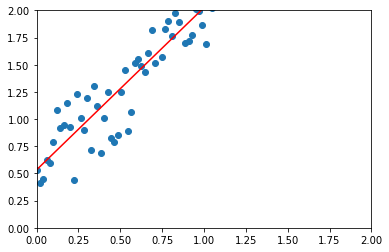

In [ ]:
print('\n Actual test: ')
print(y_batch)

print('\n Predictions: ')
print(y_pred_batch)

print('\n\n Fitted Line')
plt.scatter(x_batch, y_batch)
plt.plot(x_batch, y_pred_batch, color='red')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.savefig('plot.png')
